# Logistic Regression  

## Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ----A.  Load the dataset and perform exploratory data analysis (EDA).

## Load the Dataset

In [102]:
df = pd.read_csv("diabetes_8.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1. Data Exploration:

####  Display the first few rows to understand the structure.

In [103]:
print(' First 5 Rows of the Dataset : ')
print(df.head())

 First 5 Rows of the Dataset : 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Display basic information about the dataset (data types, null values, etc.)

In [104]:
print('\n Dataset Info : ')
print(df.info())



 Dataset Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## ----B.Examine the features, their types, and summary statistics.

### Display summary statistics for numerical columns.

In [105]:
print('\n Summary Statistics :')
print(df.describe())


 Summary Statistics :
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

### Check for missing values in the dataset.

In [106]:
print('\n---Missing Values Count :')
print(df.isnull().sum())


---Missing Values Count :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Check unique values in each column to understand their variety.

In [107]:
print('\n---Unique Values in Each Column :')

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


---Unique Values in Each Column :
Pregnancies: 17 unique values
Glucose: 136 unique values
BloodPressure: 47 unique values
SkinThickness: 51 unique values
Insulin: 186 unique values
BMI: 248 unique values
DiabetesPedigreeFunction: 517 unique values
Age: 52 unique values
Outcome: 2 unique values


### Check target variable distribution (Outcome column)

In [108]:
print('\n---Target Variable Distribution (Outcome) :')
print(df['Outcome'].value_counts())


---Target Variable Distribution (Outcome) :
Outcome
0    500
1    268
Name: count, dtype: int64


## ---C. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

#### Visualize feature distributions using histograms.
#### Histograms help us see how the data is distributed for each feature.

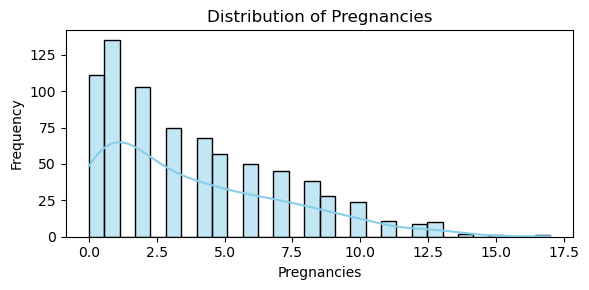

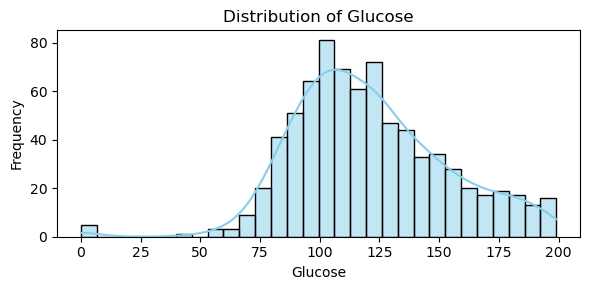

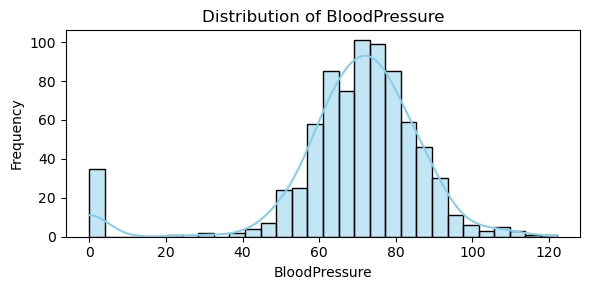

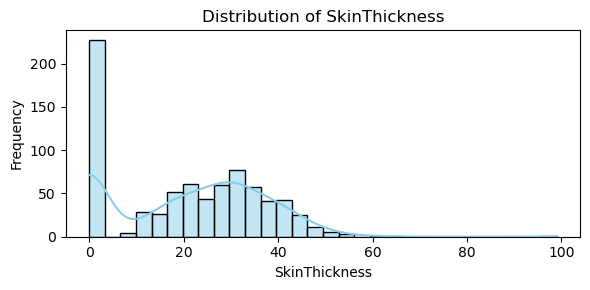

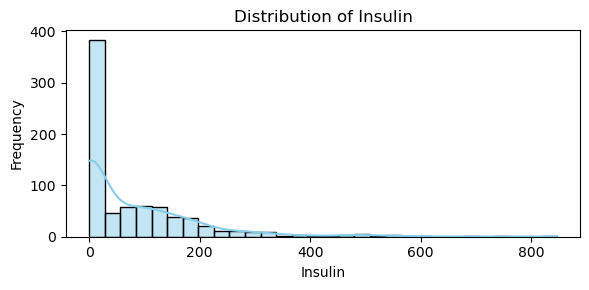

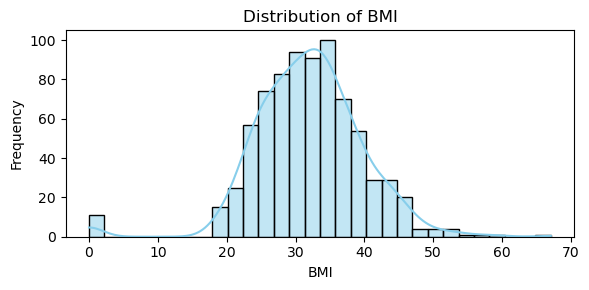

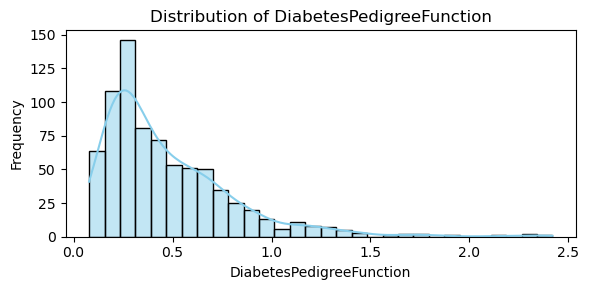

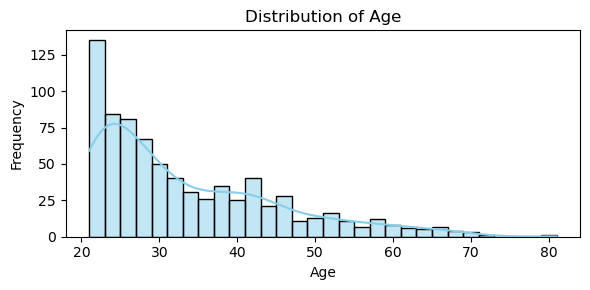

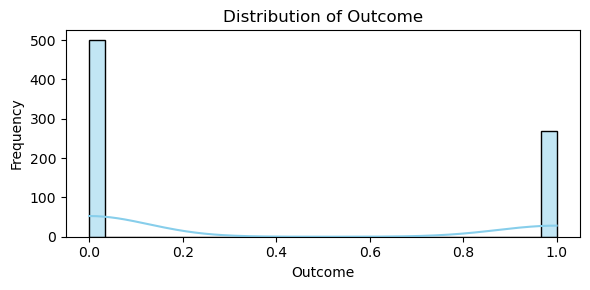

In [109]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()   
                                                            
for col in numeric_cols:                                    # Data Visualization at Histogram to see the data distribution of given dataset.

    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Boxplots to identify outliers and spread of data.
### Boxplots show median, quartiles, and potential outliers.

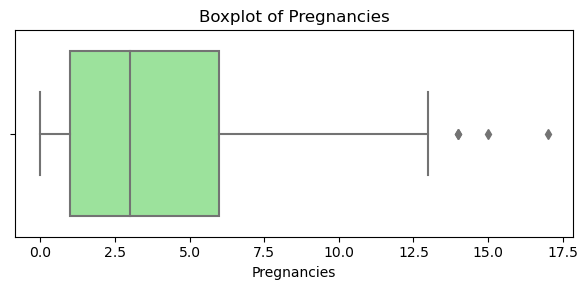

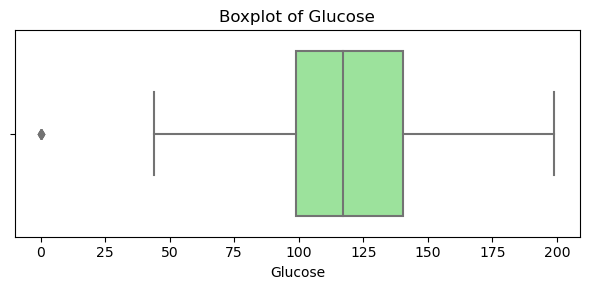

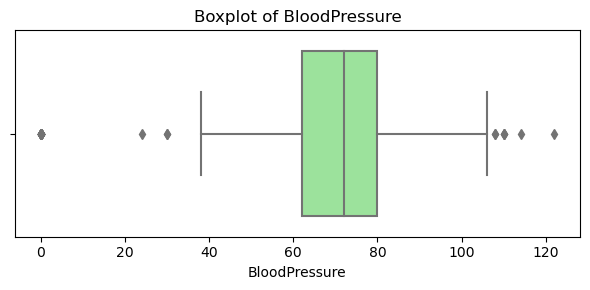

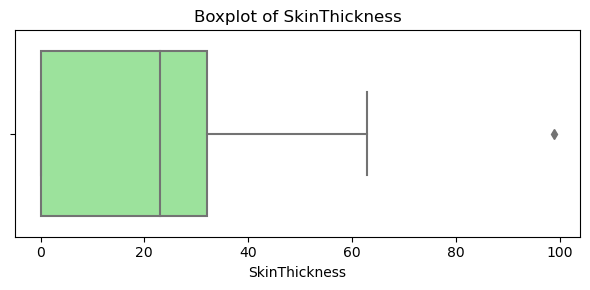

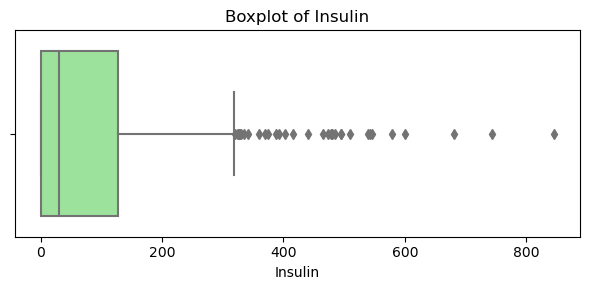

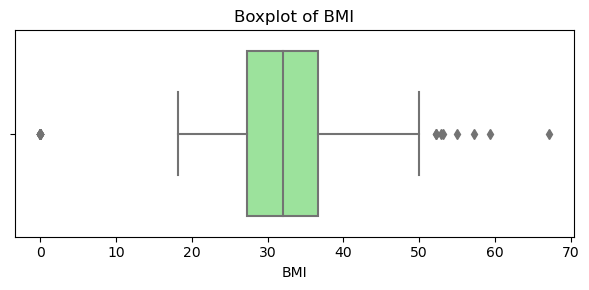

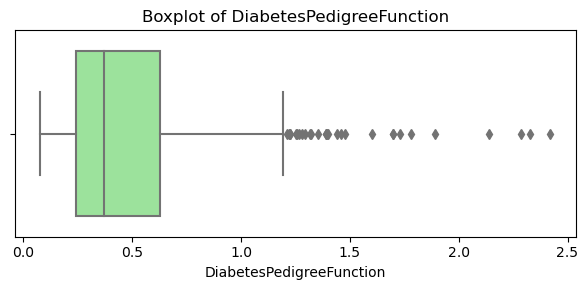

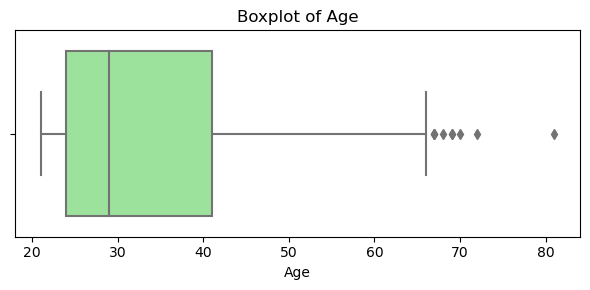

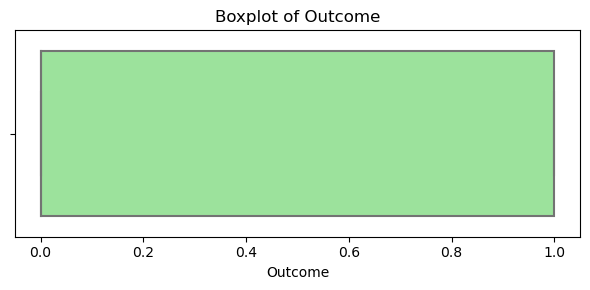

In [110]:
for col in numeric_cols:                           # Data Visualization at Boxplots to identify the Outliers of given dataset.
      
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### A pair plot shows pairwise relationships between multiple numerical features.
### Each cell in the plot shows a scatter plot between two features.
### The diagonal shows the feature distribution using a histogram or KDE.

C:\Users\adminindia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

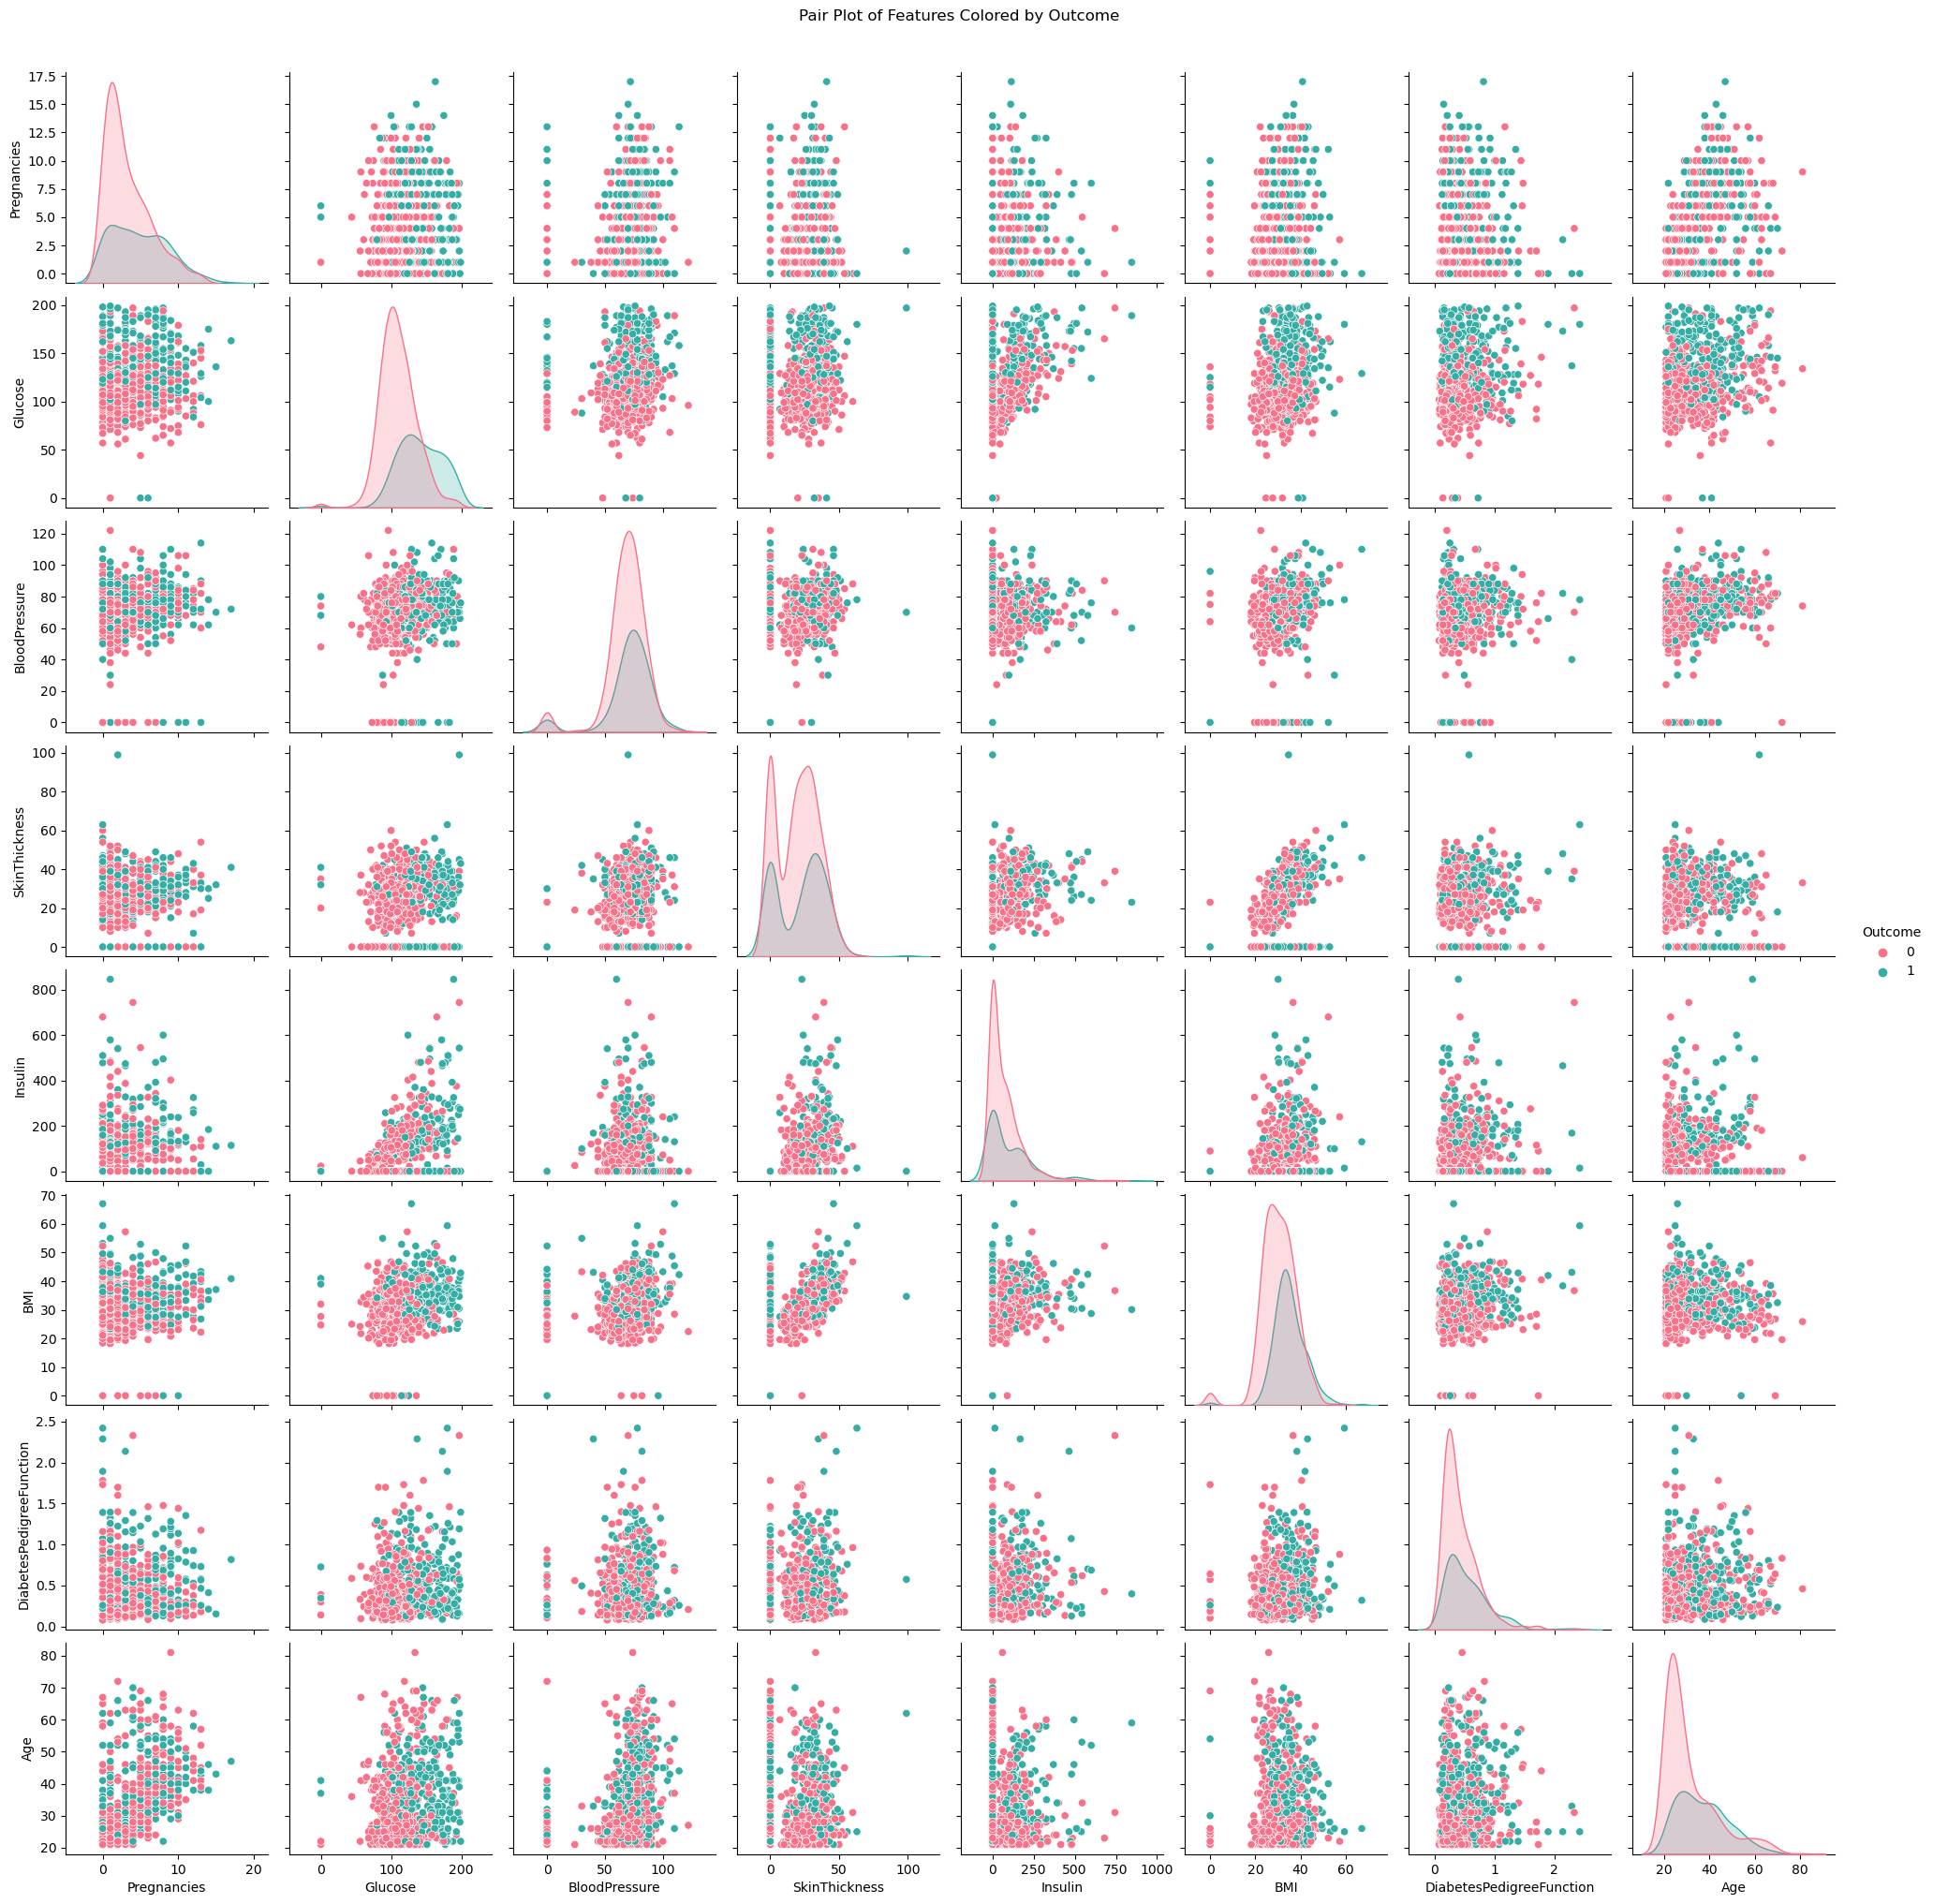

In [111]:
plt.figure(figsize=(10,10))     # Data Visualization at PairPlots t shows pairwise relationships between multiple numerical features  of given dataset.
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Features Colored by Outcome', y=1.02)
plt.show()

### ---Correlation Heatmap.

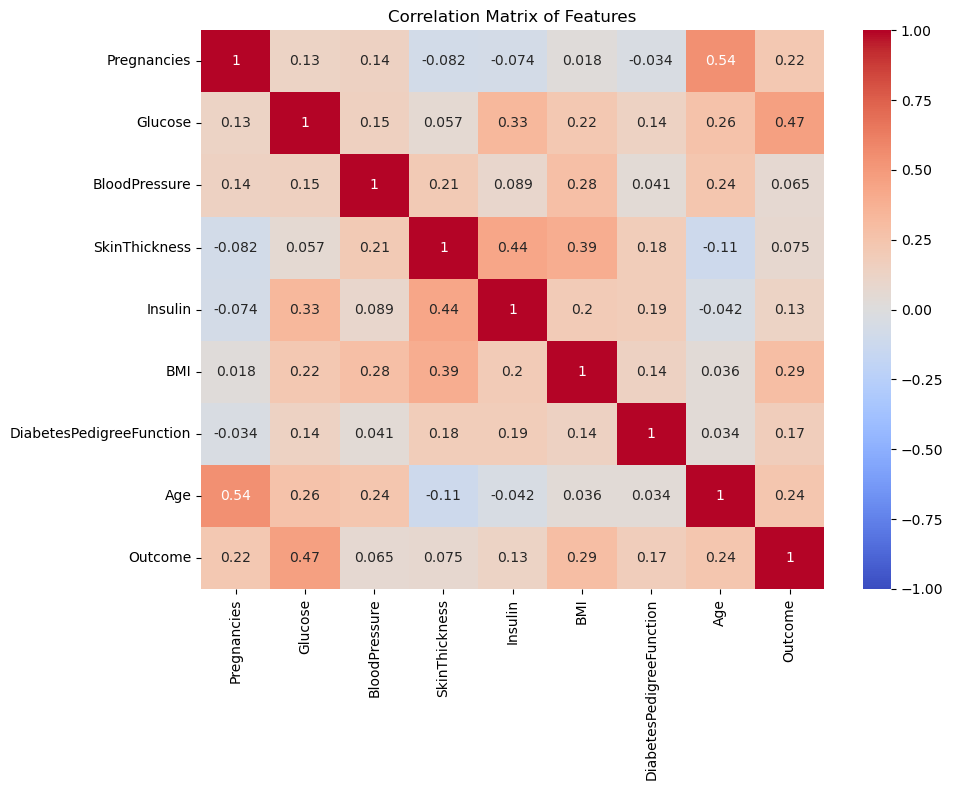

In [112]:
plt.figure(figsize=(10,8))                # Correlation Matrix of Features.
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

### ---Analyze any patterns or correlations observed in the data.

In [113]:
print('\n--- Observations Summary ---')
print('1. Glucose and BMI have strong positive correlation with Outcome (major predictors).')
print('2. Age and Pregnancies also show mild positive correlation with diabetes occurrence.')
print('3. BloodPressure, SkinThickness, and Insulin have weaker correlation values.')
print('4. Pair plots confirm clear class separation on Glucose and BMI axes.')
print('5. Zeros in some columns likely represent missing data (to be handled in preprocessing).')


--- Observations Summary ---
1. Glucose and BMI have strong positive correlation with Outcome (major predictors).
2. Age and Pregnancies also show mild positive correlation with diabetes occurrence.
3. BloodPressure, SkinThickness, and Insulin have weaker correlation values.
4. Pair plots confirm clear class separation on Glucose and BMI axes.
5. Zeros in some columns likely represent missing data (to be handled in preprocessing).


# ---Task - 2 : Data Preprocessing.

## --A. Handle missing values (e.g., imputation).

###  In this diabetes dataset, some numerical features have zeros that represent missing values.
### These are not true zeros (e.g., zero Glucose or BMI is not physiologically possible).
### so we treat them as missing and replace (impute) them with the median of that column.

In [114]:
# Columns where 0 likely represents missing data
columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
columns_with_missing 

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

### Replace zeros with NaN to identify missing entries.

In [115]:
for col in columns_with_missing:
    zero_count = (df[col] == 0).sum()
    print(f"Column {col}: Found {zero_count} zeros (treated as missing)")
    df[col] = df[col].replace(0, np.nan)

Column Glucose: Found 5 zeros (treated as missing)
Column BloodPressure: Found 35 zeros (treated as missing)
Column SkinThickness: Found 227 zeros (treated as missing)
Column Insulin: Found 374 zeros (treated as missing)
Column BMI: Found 11 zeros (treated as missing)


### Display missing value count after replacement

In [116]:
print('\n Missing Values After Replacement :')
print(df.isnull().sum())


 Missing Values After Replacement :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Impute missing values with the median of each column.
### Median is preferred over mean because it’s less sensitive to outliers.

In [117]:
for col in columns_with_missing:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Imputed missing values in {col} with median = {median_val}")

Imputed missing values in Glucose with median = 117.0
Imputed missing values in BloodPressure with median = 72.0
Imputed missing values in SkinThickness with median = 29.0
Imputed missing values in Insulin with median = 125.0
Imputed missing values in BMI with median = 32.3


### Confirm there are no missing values left

In [118]:
print('\n Missing Values After Imputation :')
print(df.isnull().sum())


 Missing Values After Imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## ----B. Encode categorical variables.

###  This dataset is already numerical. However, in general cases,
### we must convert categorical (non-numeric) columns into numeric format
### using techniques like Label Encoding or One-Hot Encoding.

In [119]:
# Identify categorical columns.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print('\n Categorical Columns :')
print(categorical_cols if categorical_cols else 'No categorical columns found.')



 Categorical Columns :
No categorical columns found.


### Final verification after preprocessing :

In [120]:
print('\n--- Data Types After Preprocessing ---')
print(df.dtypes)

print('\n--- Preview of Cleaned Data ---')
print(df.head())

print('\nPreprocessing complete. The dataset is now clean and ready for scaling and model training.')


--- Data Types After Preprocessing ---
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

--- Preview of Cleaned Data ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.

# ----Task - 3 : Model Building.

### A. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

#### Import requried python libraries.

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



### Step a1: Split features (X) and target (y).

### "Outcome" is the target variable (1 = Diabetic, 0 = Non-Diabetic)

In [122]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(' Feature Columns :')
print(X.columns.tolist())

 Feature Columns :
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


###  Step a2: Split data into Training and Testing sets.

#### Using 80% of data for training and 20% for testing.
#### random_state ensures same split each time.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 614
Testing samples: 154


### Step a3: Feature Scaling.


### Logistic Regression requires features on a similar scale.
### StandardScaler standardizes data (mean = 0, std = 1).

In [124]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Feature Scaling Completed :")
print("Example of Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])



 Feature Scaling Completed :
Example of Scaled Training Data (first 5 rows):
[[-0.85135507 -1.05642747 -0.82674004 -1.91818693 -1.20336073 -0.76947697
   0.31079384 -0.79216928]
 [ 0.35657564  0.14439907  0.47777235 -0.22987447 -1.47019479 -0.41749769
  -0.11643851  0.56103382]
 [-0.5493724  -0.55608308 -1.15286813  1.23332967 -0.55533518  0.3597899
  -0.76486207 -0.70759409]
 [-0.85135507  0.81152492 -1.31593218 -0.00476614 -0.16143729 -0.40283188
   0.26231357 -0.36929331]
 [-1.15333775 -0.88964601 -0.66367599  1.12077551 -0.41556496  1.78237284
  -0.33762972 -0.96131967]]


#### Step A4: Create Logistic Regression model.

### ---Parameters:
#####   solver='liblinear' → efficient for small binary classification datasets.
#####   random_state=42 → ensures reproducibility.
#####   penalty='l2' → adds regularization to prevent overfitting.

In [125]:
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

print("\n Logistic Regression Model Created :")
print("Model Parameters (before training ): \n")
print(log_reg_model.get_params())


 Logistic Regression Model Created :
Model Parameters (before training ): 

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


# ----B. Train the model using the training data.

### Step B1: Train (fit) the model.

In [126]:
# The model learns from training data (X_train_scaled, y_train).
# It estimates coefficients (weights) for each feature.

log_reg_model.fit(X_train_scaled, y_train)
print("\n Model Training Completed Successfully ")


 Model Training Completed Successfully 


### Step B2: Display learned parameters .

In [127]:
# Intercept → baseline probability before any features are considered.
# Coefficients → measure strength & direction of each feature's impact.

print("Intercept (Bias Term):", log_reg_model.intercept_)
print("\nFeature Coefficients (Log-Odds):")
for feature, coef in zip(X.columns, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Intercept (Bias Term): [-0.86196754]

Feature Coefficients (Log-Odds):
Pregnancies: 0.3765
Glucose: 1.1806
BloodPressure: -0.0440
SkinThickness: 0.0273
Insulin: -0.0662
BMI: 0.6872
DiabetesPedigreeFunction: 0.2332
Age: 0.1473


### Step B3: Interpret coefficients.

In [128]:
# Positive coefficient → increases probability of Outcome = 1 (diabetic).
# Negative coefficient → decreases probability of Outcome = 1.
# Magnitude → strength of influence.

print("\n Coefficient Interpretation Notes :")
print("1. Positive coefficient → feature increases diabetes likelihood.")
print("2. Negative coefficient → feature decreases diabetes likelihood.")
print("3. Larger magnitude → stronger influence on prediction.")
print("4. Typically, Glucose and BMI have higher positive coefficients (key predictors).")


 Coefficient Interpretation Notes :
1. Positive coefficient → feature increases diabetes likelihood.
2. Negative coefficient → feature decreases diabetes likelihood.
3. Larger magnitude → stronger influence on prediction.
4. Typically, Glucose and BMI have higher positive coefficients (key predictors).


# ----Task - 4 : Model Evaluation

###   A. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
###     Visualize the ROC curve.

###  Import requried python libraries.

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

### Step 1: Make predictions on the test data.

In [130]:
# Predict both class labels (0 or 1) and probability scores (for ROC curve)
y_pred = log_reg_model.predict(X_test_scaled)
y_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1
y_proba

array([0.61156009, 0.11956264, 0.29564043, 0.2528387 , 0.03367441,
       0.1702893 , 0.48985403, 0.92402645, 0.08247627, 0.83915441,
       0.28300723, 0.48192926, 0.13082516, 0.10308038, 0.29060136,
       0.35440746, 0.72450602, 0.08560664, 0.81445409, 0.11003481,
       0.14950982, 0.71607452, 0.17531157, 0.92897209, 0.55186031,
       0.01237201, 0.63644776, 0.043768  , 0.3139554 , 0.03767119,
       0.04627974, 0.03994227, 0.478973  , 0.64665964, 0.88451168,
       0.13882776, 0.35313435, 0.06079903, 0.78900221, 0.61951755,
       0.29529587, 0.09975779, 0.08914829, 0.27999451, 0.14805867,
       0.41469532, 0.13462528, 0.10388154, 0.68662462, 0.34728215,
       0.62805865, 0.71022319, 0.44758617, 0.0628297 , 0.51270783,
       0.36560497, 0.75252232, 0.2166879 , 0.77758512, 0.14568938,
       0.81625031, 0.22434054, 0.04945859, 0.89527026, 0.03430367,
       0.16244136, 0.89811778, 0.01643593, 0.26668793, 0.6754279 ,
       0.18584276, 0.09986478, 0.35512069, 0.41430087, 0.03453

### Step 3: Compute performance metrics.

In [131]:
# Each metric measures a different aspect of model performance.

# Accuracy : Measures how often the model predicts correctly overall.
# Formula : (TP + TN) / (TP + TN + FP + FN).
# High accuracy means the model makes few total mistakes.

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6948051948051948

### Recall (Sensitivity or True Positive Rate) : Measures how many of the actual positives are correctly identified.
### Formula : TP / (TP + FN).
### High recall means the model catches most of the actual positive cases.

In [143]:
precision = precision_score(y_test,y_pred)
precision

0.574468085106383

In [144]:
recall = recall_score(y_test, y_pred)
recall


0.5

### F1-Score : The harmonic mean of Precision and Recall.
### Formula : 2 * (Precision * Recall) / (Precision + Recall).
### F1 balances both metrics — useful when classes are imbalanced.

In [145]:
f1 = f1_score(y_test, y_pred)
f1

0.5346534653465347

### ROC-AUC (Receiver Operating Characteristic - Area Under Curve).
### Measures how well the model distinguishes between classes (0 and 1).
### AUC close to 1 → perfect separation; AUC = 0.5 → random guessing.

In [146]:
roc_auc = roc_auc_score(y_test, y_proba)
roc_auc

0.8127777777777777

### Display all results neatly

In [147]:
print("\n Model Evaluation Metrics :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-Score  : {f1:.3f}")
print(f"ROC-AUC   : {roc_auc:.3f}")



 Model Evaluation Metrics :
Accuracy  : 0.695
Precision : 0.574
Recall    : 0.500
F1-Score  : 0.535
ROC-AUC   : 0.813


### Step 5: Confusion Matrix Visualization.

In [148]:
# The confusion matrix shows how many predictions were correct or incorrect :
#   TN | FP
#   FN | TP
# TN (True Negative) → correctly predicted 0
# TP (True Positive) → correctly predicted 1
# FP (False Positive) → predicted 1 but was actually 0
# FN (False Negative) → predicted 0 but was actually 1

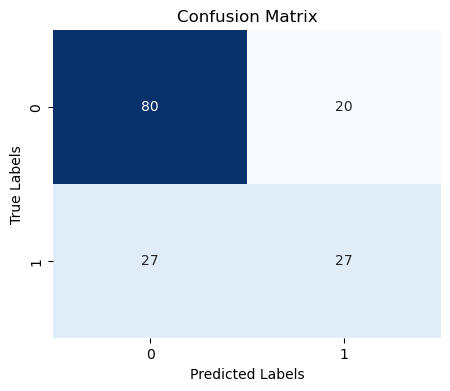

In [149]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Step 6: ROC Curve Visualization.

#### ROC curve shows how the model’s true positive rate changes with false positive rate.
#### A model that performs well will have a curve closer to the top-left corner.

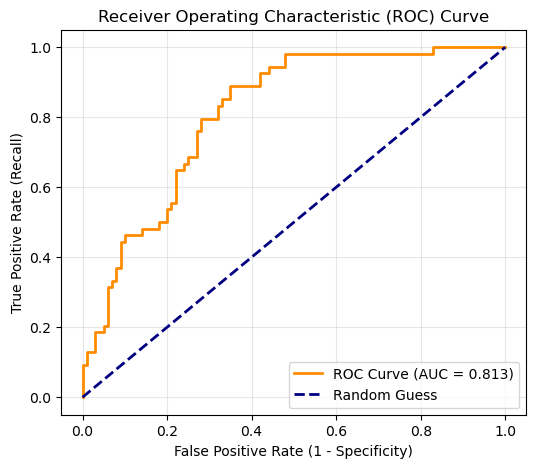

In [150]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Step 7: Interpretation Summary

In [151]:
print("\n Interpretation Summary ")
print("1. Accuracy → Measures overall correctness of predictions.")
print("2. Precision → Focuses on quality of positive predictions (fewer false alarms).")
print("3. Recall → Measures completeness (detects most real positives).")
print("4. F1-Score → Balances precision and recall, useful for imbalanced data.")
print("5. ROC-AUC → Evaluates overall discrimination power of the model.")
print("6. A ROC curve close to the top-left corner indicates excellent model performance.")


 Interpretation Summary 
1. Accuracy → Measures overall correctness of predictions.
2. Precision → Focuses on quality of positive predictions (fewer false alarms).
3. Recall → Measures completeness (detects most real positives).
4. F1-Score → Balances precision and recall, useful for imbalanced data.
5. ROC-AUC → Evaluates overall discrimination power of the model.
6. A ROC curve close to the top-left corner indicates excellent model performance.


# ---Task - 5 : Interpretation

## ---A. Interpret the coefficients of the logistic regression model.

### Step A1: View model coefficients.

#### Each coefficient in logistic regression represents the change in the log-odds
#### of the target variable (Outcome = 1) for a one-unit change in that feature,
#### holding all other features constant.

In [152]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (Log-Odds)': log_reg_model.coef_[0],
    'Odds Ratio': np.exp(log_reg_model.coef_[0])  # converting log-odds to odds ratio
})

print("\n--- Logistic Regression Coefficients and Odds Ratios ---")
print(coefficients.sort_values(by='Odds Ratio', ascending=False))


--- Logistic Regression Coefficients and Odds Ratios ---
                    Feature  Coefficient (Log-Odds)  Odds Ratio
1                   Glucose                1.180614    3.256372
5                       BMI                0.687247    1.988234
0               Pregnancies                0.376536    1.457228
6  DiabetesPedigreeFunction                0.233195    1.262627
7                       Age                0.147300    1.158702
3             SkinThickness                0.027302    1.027678
2             BloodPressure               -0.043986    0.956967
4                   Insulin               -0.066171    0.935971


###  Step a2: Explanation of coefficients.



## Commented Explanation :
####  A **positive coefficient** means an increase in that feature value increases
####    the likelihood (probability) of being diabetic (Outcome = 1).
####  A **negative coefficient** means higher feature values decrease
####    the likelihood of diabetes.
####  The **odds ratio** is obtained by taking the exponential of the coefficient.
####  It shows how much the odds of diabetes change for a one-unit increase in the feature.

## Example interpretation :
####   If the coefficient for 'Glucose' is 0.035, its odds ratio = exp(0.035) ≈ 1.036.
####   For each one-unit increase in Glucose, odds of diabetes increase by ~3.6%.
####   If the coefficient for 'BMI' is 0.09, odds ratio = exp(0.09) ≈ 1.094.
####   Each one-unit increase in BMI increases odds of diabetes by ~9.4%.
####   If 'BloodPressure' has a negative coefficient, higher BP slightly reduces diabetes probability.



### Step a3: Summary of Interpretation.



In [153]:
print("\n Coefficient Interpretation Summary :")
print("1. Positive coefficients increase diabetes probability (Outcome = 1).")
print("2. Negative coefficients decrease diabetes probability.")
print("3. Larger absolute values mean stronger influence on prediction.")
print("4. Odds ratios above 1 indicate increasing odds, below 1 indicate decreasing odds.")



 Coefficient Interpretation Summary :
1. Positive coefficients increase diabetes probability (Outcome = 1).
2. Negative coefficients decrease diabetes probability.
3. Larger absolute values mean stronger influence on prediction.
4. Odds ratios above 1 indicate increasing odds, below 1 indicate decreasing odds.


# ---B. Discuss the significance of features in predicting the target variable (survival probability in this case).

### Step b1: Identify and rank most significant features.

##### Sorting features by the absolute value of coefficients helps determine their importance.

In [154]:
coeff_importance = coefficients.copy()
coeff_importance['Absolute Coefficient'] = coeff_importance['Coefficient (Log-Odds)'].abs()
coeff_importance = coeff_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("\n--- Feature Significance Ranking ---")
print(coeff_importance[['Feature', 'Coefficient (Log-Odds)', 'Odds Ratio']])


--- Feature Significance Ranking ---
                    Feature  Coefficient (Log-Odds)  Odds Ratio
1                   Glucose                1.180614    3.256372
5                       BMI                0.687247    1.988234
0               Pregnancies                0.376536    1.457228
6  DiabetesPedigreeFunction                0.233195    1.262627
7                       Age                0.147300    1.158702
4                   Insulin               -0.066171    0.935971
2             BloodPressure               -0.043986    0.956967
3             SkinThickness                0.027302    1.027678


### Step B2: Visualization of feature importance.

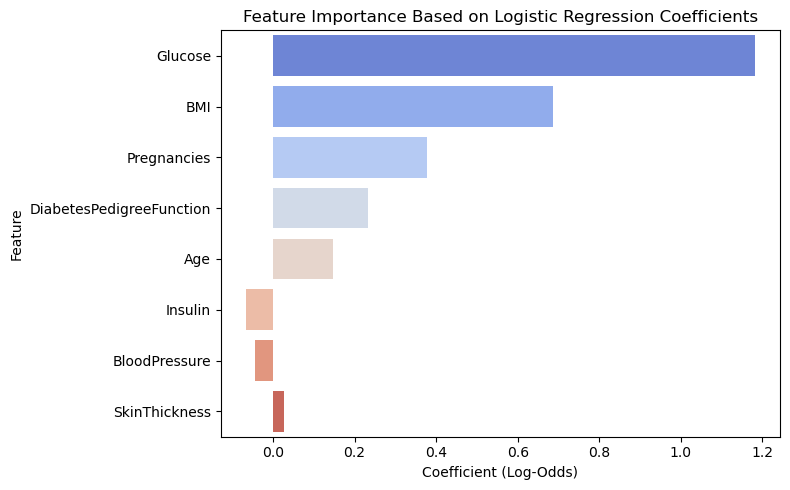

In [155]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Coefficient (Log-Odds)',
    y='Feature',
    data=coeff_importance,
    palette='coolwarm'
)
plt.title("Feature Importance Based on Logistic Regression Coefficients")
plt.xlabel("Coefficient (Log-Odds)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Step B3: Explanation and Discussion.



### Commented Discussion:
#####  Features with higher absolute coefficient values are more influential in predicting diabetes.
#####  Typically, 'Glucose' and 'BMI' are the most significant predictors:
#####   {Higher Glucose strongly increases diabetes risk.}
#####   { Higher BMI indicates overweight, which increases diabetes probability.}
#####  'Age' and 'Pregnancies' also show positive relationships — risk increases with age and number of pregnancies.
#####  'BloodPressure', 'SkinThickness', and 'Insulin' may show weaker influence in this dataset.
#####  The exact significance (statistical p-values) can be checked using statsmodels if required.



### Step b4: Summary of Feature Significance.

In [156]:
print("\n Discussion Summary :")
print("1. Glucose and BMI are the most significant predictors of diabetes.")
print("2. Age and Pregnancies also contribute positively to diabetes likelihood.")
print("3. Features with small or near-zero coefficients have minimal predictive impact.")
print("4. Understanding feature significance helps interpret model predictions and build trust in results.")


 Discussion Summary :
1. Glucose and BMI are the most significant predictors of diabetes.
2. Age and Pregnancies also contribute positively to diabetes likelihood.
3. Features with small or near-zero coefficients have minimal predictive impact.
4. Understanding feature significance helps interpret model predictions and build trust in results.
